In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("regression-one.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
df.rename(columns = {"Life expectancy": "life-expect"}, inplace= True)
df = df.dropna()
df.shape

(1649, 22)

In [14]:
df[df.isnull().any(axis=1)]

,Country,Year,Status,life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [15]:
X = df["GDP"]
Y = df["life-expect"]

In [17]:
f = np.polyfit(X, Y, 3)
model = np.poly1d(f)
print(model)


           3           2
1.243e-13 x - 2.3e-08 x + 0.00116 x + 65.44


In [18]:
line = np.linspace(X.min(), X.max(), 100)

In [19]:
X.min()

1.68135

In [20]:
X.max()

119172.7418

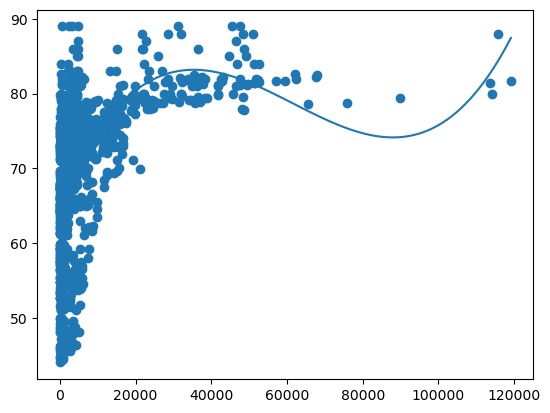

In [22]:
plt.scatter(X, Y)
plt.plot(line, model(line))
plt.show()

In [23]:
predicted_life_span = model(60000)
predicted_life_span

79.10206621953851

In [40]:
predicted_life_span = model(51203)#based on Germany GDP
predicted_life_span

83.11374366887644

In [26]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(df[["GDP"]], Y)

LinearRegression()

In [28]:
predicted_value = slr.predict([[51203]])
print(predicted_value)


[84.7410432]


/Users/thirijewel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
f5 = np.polyfit(X, Y, 5)
model5 = np.poly1d(f5)
print(model5)


           5             4             3             2
8.365e-23 x - 2.273e-17 x + 2.185e-12 x - 9.299e-08 x + 0.001871 x + 64.58


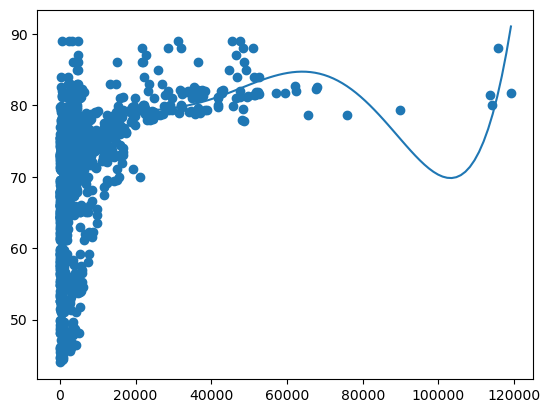

In [31]:
line = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, Y)
plt.plot(line, model5(line))
plt.show()

In [36]:
predicted_life_span = model5(51203)#based on Germany GDP
predicted_life_span

83.11374366887644

           12             11             10             9             8
2.417e-55 x  - 1.639e-49 x  + 4.588e-44 x  - 6.754e-39 x + 5.318e-34 x
              7             6             5             4            3
 - 1.605e-29 x - 7.753e-25 x + 9.452e-20 x - 3.934e-15 x + 8.33e-11 x
              2
 - 8.974e-07 x + 0.004766 x + 62.89


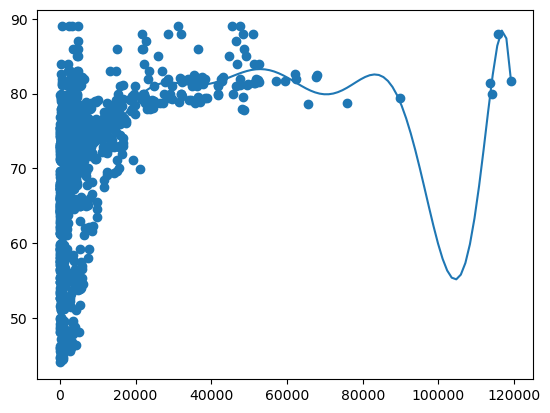

In [37]:
f12 = np.polyfit(X, Y, 12)
model12 = np.poly1d(f12)
print(model12)
line = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, Y)
plt.plot(line, model12(line))
plt.show()


In [38]:
predicted_life_span = model12(51203)#based on Germany GDP
predicted_life_span

83.2281437876639